In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from collections import Counter 
import matplotlib.pyplot as plt




In [2]:
def joining(arr):
    return ' '.join(arr)

def counter(poets):
    count = Counter()
    for text in poets.values:
        for w in text.split():
            count[w] += 1
    return count
def labling(dataframe):
    labels = []
    id = dataframe['poet_id'].to_numpy()
    unique_id = np.unique(id)
    for i in id:
        for j in range(len(unique_id)):
            if i == unique_id[j]:
                labels.append(j)

    return np.array(labels)


# prepering files
getting number of words

In [3]:
df = pd.read_csv('new_poems_5top_CNS2.csv')
poem_text = df['poem_text'].to_numpy()
words_in_text = counter(df.poem_text) # counting number of words
train_label = labling(df)

classes_number = len(np.unique(train_label))

print("number of poems: ",len(poem_text))
print("number of poets: ", classes_number)

train_data, test_data, train_label, test_labes = train_test_split(poem_text, train_label, train_size=0.8)
classes_number = len(np.unique(train_label))

dim_number = 21
words_number = int(len(words_in_text)) # length of words

number of poems:  7523
number of poets:  5


# Tokenizing And Padding

In [4]:
tokenizer = Tokenizer(num_words=words_number, oov_token='<OOV>', lower=False)
tokenizer.fit_on_texts(train_data)
word_index = tokenizer.word_index
    
train_data = tokenizer.texts_to_sequences(train_data)
test_data = tokenizer.texts_to_sequences(test_data)

train_data = pad_sequences(train_data, padding='post', maxlen=500) 
test_data = pad_sequences(test_data, padding='post', maxlen=500) 


In [13]:
model = keras.Sequential()
model.add(keras.layers.Embedding(words_number, 128))
model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
#model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(dim_number, activation='relu'))
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(classes_number, activation='softmax'))

In [14]:
print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         13081472  
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 21)                5397      
                                                                 
 dropout_2 (Dropout)         (None, 21)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 110       
                                                                 
Total params: 13,350,147
Trainable params: 13,350,147
Non-trainable params: 0
__________________________________________

In [15]:
history = model.fit(x=train_data, y=train_label, validation_data=(test_data, test_labes), batch_size = 10, epochs = 3, shuffle = True, verbose = 2)


Epoch 1/3
602/602 - 39s - loss: 1.3779 - accuracy: 0.3835 - val_loss: 1.0568 - val_accuracy: 0.5415 - 39s/epoch - 65ms/step
Epoch 2/3
602/602 - 55s - loss: 0.7491 - accuracy: 0.7036 - val_loss: 0.8194 - val_accuracy: 0.7076 - 55s/epoch - 91ms/step
Epoch 3/3
602/602 - 66s - loss: 0.2388 - accuracy: 0.9227 - val_loss: 0.9536 - val_accuracy: 0.7229 - 66s/epoch - 110ms/step


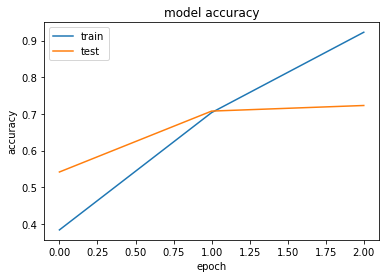

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

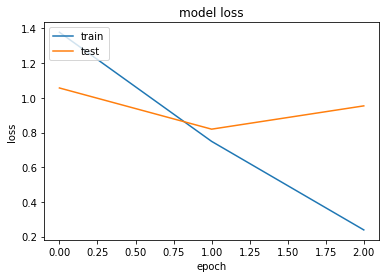

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()